# Elastic Net ...

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
session = tf.Session()
iris = datasets.load_iris()

In [29]:
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

- $x \in \mathbb R^3$
- $A \in \mathbb R_{3 \times 1}$
- $y = Ax + b \in \mathbb R$

In [30]:
batcha_size = 50
learning_rate = 0.001
x_data = tf.placeholder(shape = [None, 3], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [3, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))
y_pred = tf.add(tf.matmul(x_data, A), b)

$$ Loss = \sum\frac{(y_r - y_p)^2}{n} + \alpha \cdot |A| + \beta \cdot A^2$$

In [31]:
elastic_param1 = tf.constant(1.0)
elastic_param2 = tf.constant(1.0)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - y_pred)), e1_term), e2_term), 0)

In [32]:
init = tf.global_variables_initializer()
session.run(init)

In [33]:
my_optim = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train_step = my_optim.minimize(loss)

In [34]:
loss_vect = []
for i in range(50000):
    rand_idx = np.random.choice(len(x_vals), size = batcha_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict = {x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss[0])
    if (i + 1) % 100 == 0:
        print("Paso # " + str(i + 1) + ", A = " + str(session.run(A)) + ", b = " + str(session.run(b)) + ", Loss = " + str(temp_loss[0]))

Paso # 100, A = [[1.7427545 ]
 [0.11133727]
 [0.3136782 ]], b = [[-0.25759405]], Loss = 2.4904246
Paso # 200, A = [[1.5597103 ]
 [0.24253058]
 [0.321552  ]], b = [[-0.25458163]], Loss = 1.968204
Paso # 300, A = [[1.431696  ]
 [0.33318445]
 [0.31192037]], b = [[-0.2407174]], Loss = 1.73685
Paso # 400, A = [[1.3415334 ]
 [0.3957916 ]
 [0.29187304]], b = [[-0.21952747]], Loss = 1.5805717
Paso # 500, A = [[1.278353  ]
 [0.43924722]
 [0.2653883 ]], b = [[-0.1933101]], Loss = 1.5576218
Paso # 600, A = [[1.235964  ]
 [0.47624943]
 [0.23712981]], b = [[-0.16227764]], Loss = 1.4809647
Paso # 700, A = [[1.1990505]
 [0.502876 ]
 [0.20771  ]], b = [[-0.13088568]], Loss = 1.3525863
Paso # 800, A = [[1.1738514 ]
 [0.5237111 ]
 [0.17846611]], b = [[-0.09746836]], Loss = 1.4997498
Paso # 900, A = [[1.1531926 ]
 [0.54348177]
 [0.15116435]], b = [[-0.06351525]], Loss = 1.4567673
Paso # 1000, A = [[1.1342729 ]
 [0.55108196]
 [0.12219285]], b = [[-0.03001508]], Loss = 1.2966459
Paso # 1100, A = [[1.119612

Paso # 8200, A = [[6.079837e-01]
 [5.016920e-01]
 [4.570377e-04]], b = [[1.98681]], Loss = 0.6933956
Paso # 8300, A = [[6.0356987e-01]
 [4.9954540e-01]
 [3.0263537e-04]], b = [[2.008903]], Loss = 0.6961371
Paso # 8400, A = [[6.0035235e-01]
 [4.9665090e-01]
 [6.3227199e-05]], b = [[2.0314188]], Loss = 0.64957386
Paso # 8500, A = [[5.9579682e-01]
 [4.9913388e-01]
 [6.9900459e-05]], b = [[2.0534225]], Loss = 0.6985283
Paso # 8600, A = [[5.8719540e-01]
 [4.9338758e-01]
 [2.5704864e-04]], b = [[2.0738235]], Loss = 0.6464612
Paso # 8700, A = [[5.8385831e-01]
 [4.9597478e-01]
 [1.3105487e-04]], b = [[2.0956852]], Loss = 0.6772506
Paso # 8800, A = [[5.7853466e-01]
 [4.9400005e-01]
 [2.6843438e-05]], b = [[2.1168795]], Loss = 0.6611974
Paso # 8900, A = [[5.7310247e-01]
 [4.9022448e-01]
 [2.1283898e-04]], b = [[2.1376793]], Loss = 0.67038083
Paso # 9000, A = [[ 5.6531543e-01]
 [ 4.8971894e-01]
 [-3.5528262e-04]], b = [[2.157908]], Loss = 0.6687251
Paso # 9100, A = [[5.6261218e-01]
 [4.9081996e-0

Paso # 16000, A = [[0.2825082 ]
 [0.42011732]
 [0.00045747]], b = [[3.3322847]], Loss = 0.41413417
Paso # 16100, A = [[ 2.7910626e-01]
 [ 4.1989034e-01]
 [-6.3061118e-05]], b = [[3.345416]], Loss = 0.41922808
Paso # 16200, A = [[ 0.27492714]
 [ 0.41718778]
 [-0.0004898 ]], b = [[3.3580706]], Loss = 0.45027527
Paso # 16300, A = [[2.7441543e-01]
 [4.2161864e-01]
 [2.6619702e-04]], b = [[3.3720038]], Loss = 0.5473787
Paso # 16400, A = [[0.26948017]
 [0.4167983 ]
 [0.00042283]], b = [[3.3843982]], Loss = 0.4432756
Paso # 16500, A = [[0.2680802 ]
 [0.41820776]
 [0.000556  ]], b = [[3.3979037]], Loss = 0.4300296
Paso # 16600, A = [[ 2.6415965e-01]
 [ 4.1700965e-01]
 [-8.3501858e-05]], b = [[3.4103825]], Loss = 0.43381754
Paso # 16700, A = [[2.6209804e-01]
 [4.1173497e-01]
 [1.6281009e-04]], b = [[3.4229794]], Loss = 0.40005872
Paso # 16800, A = [[2.5937921e-01]
 [4.1244334e-01]
 [2.6902702e-04]], b = [[3.43573]], Loss = 0.43959612
Paso # 16900, A = [[2.5332004e-01]
 [4.1179034e-01]
 [1.14864

Paso # 23800, A = [[8.4543079e-02]
 [3.7382656e-01]
 [4.2276079e-06]], b = [[4.140154]], Loss = 0.34839797
Paso # 23900, A = [[0.08212029]
 [0.3774914 ]
 [0.00045733]], b = [[4.1480885]], Loss = 0.39832708
Paso # 24000, A = [[7.9149298e-02]
 [3.7442517e-01]
 [2.4408172e-04]], b = [[4.155583]], Loss = 0.3892583
Paso # 24100, A = [[ 7.7947177e-02]
 [ 3.7508073e-01]
 [-5.2269606e-06]], b = [[4.1634192]], Loss = 0.3390997
Paso # 24200, A = [[7.2143763e-02]
 [3.6884543e-01]
 [6.3131447e-05]], b = [[4.1699266]], Loss = 0.2894803
Paso # 24300, A = [[0.07440434]
 [0.36984   ]
 [0.00069282]], b = [[4.178675]], Loss = 0.30717647
Paso # 24400, A = [[7.2357193e-02]
 [3.7149838e-01]
 [2.4686599e-04]], b = [[4.1862926]], Loss = 0.34572718
Paso # 24500, A = [[7.0849560e-02]
 [3.7015206e-01]
 [2.2114646e-04]], b = [[4.1940036]], Loss = 0.41476592
Paso # 24600, A = [[6.9625996e-02]
 [3.7160671e-01]
 [2.7598138e-04]], b = [[4.2018113]], Loss = 0.39049613
Paso # 24700, A = [[0.06787213]
 [0.3685582 ]
 [0

Paso # 31800, A = [[0.00068435]
 [0.33168206]
 [0.00046508]], b = [[4.5862994]], Loss = 0.36811647
Paso # 31900, A = [[-4.04000049e-04]
 [ 3.26200157e-01]
 [-1.14101975e-04]], b = [[4.5883346]], Loss = 0.26098993
Paso # 32000, A = [[1.1449173e-04]
 [3.2905996e-01]
 [5.0880585e-04]], b = [[4.59006]], Loss = 0.27879846
Paso # 32100, A = [[ 2.6465609e-04]
 [ 3.2560268e-01]
 [-1.3767858e-06]], b = [[4.592058]], Loss = 0.31192484
Paso # 32200, A = [[0.00046775]
 [0.32954618]
 [0.00036467]], b = [[4.594445]], Loss = 0.35690594
Paso # 32300, A = [[1.3220359e-03]
 [3.2951236e-01]
 [3.1894317e-04]], b = [[4.596152]], Loss = 0.33274865
Paso # 32400, A = [[0.00145082]
 [0.3308305 ]
 [0.00043741]], b = [[4.598604]], Loss = 0.34173813
Paso # 32500, A = [[2.4752831e-04]
 [3.2421294e-01]
 [3.2619737e-05]], b = [[4.5998354]], Loss = 0.35865945
Paso # 32600, A = [[-2.3120485e-04]
 [ 3.2622403e-01]
 [-1.9297501e-04]], b = [[4.6017704]], Loss = 0.28287783
Paso # 32700, A = [[-0.00081135]
 [ 0.32787696]
 

Paso # 39600, A = [[0.00052443]
 [0.32018277]
 [0.00065608]], b = [[4.6377974]], Loss = 0.34914693
Paso # 39700, A = [[0.00061034]
 [0.31740668]
 [0.00070266]], b = [[4.6370115]], Loss = 0.30481145
Paso # 39800, A = [[1.04892395e-04]
 [3.20399344e-01]
 [4.33882931e-04]], b = [[4.6376524]], Loss = 0.3608445
Paso # 39900, A = [[0.00033684]
 [0.32194638]
 [0.00055362]], b = [[4.6377516]], Loss = 0.34595045
Paso # 40000, A = [[-3.5529956e-06]
 [ 3.2161433e-01]
 [ 8.5575011e-05]], b = [[4.6374707]], Loss = 0.27737072
Paso # 40100, A = [[0.00081965]
 [0.32013953]
 [0.00051497]], b = [[4.637658]], Loss = 0.35923588
Paso # 40200, A = [[1.0731875e-04]
 [3.2131714e-01]
 [7.0069742e-04]], b = [[4.6373806]], Loss = 0.3476981
Paso # 40300, A = [[3.149712e-04]
 [3.206970e-01]
 [4.716239e-04]], b = [[4.6368647]], Loss = 0.31565738
Paso # 40400, A = [[0.00041626]
 [0.3241338 ]
 [0.00050205]], b = [[4.6375647]], Loss = 0.3494572
Paso # 40500, A = [[9.8551728e-04]
 [3.2036701e-01]
 [2.9268095e-04]], b =

Paso # 47400, A = [[3.0593332e-04]
 [3.2017034e-01]
 [5.0046400e-04]], b = [[4.640775]], Loss = 0.33893734
Paso # 47500, A = [[3.343833e-04]
 [3.214062e-01]
 [2.797413e-04]], b = [[4.640886]], Loss = 0.32816336
Paso # 47600, A = [[-2.1373172e-04]
 [ 3.2145494e-01]
 [-5.8293663e-05]], b = [[4.6404934]], Loss = 0.29898775
Paso # 47700, A = [[0.00038407]
 [0.32563213]
 [0.00058202]], b = [[4.6416783]], Loss = 0.33228505
Paso # 47800, A = [[1.5239578e-04]
 [3.1878087e-01]
 [8.1232240e-05]], b = [[4.640035]], Loss = 0.28166547
Paso # 47900, A = [[-4.0508469e-04]
 [ 3.1604967e-01]
 [ 2.3074707e-04]], b = [[4.6395473]], Loss = 0.27580976
Paso # 48000, A = [[-4.1228076e-04]
 [ 3.2094440e-01]
 [-2.1582219e-04]], b = [[4.6403146]], Loss = 0.30153805
Paso # 48100, A = [[ 4.41554294e-04]
 [ 3.18786055e-01]
 [-1.13629736e-04]], b = [[4.6396356]], Loss = 0.33981887
Paso # 48200, A = [[4.9184606e-04]
 [3.2015172e-01]
 [2.4459691e-04]], b = [[4.6396704]], Loss = 0.28680113
Paso # 48300, A = [[-2.53270

In [35]:
slope = session.run(A)
[[intercept]] = session.run(b)
print("(x1, x2, x3)" + str(np.round(slope, 3))+ " + " + str(np.round(intercept, 3)))
print("-----------------------------------------------------------------------------------------------------------------")
print(str(np.round(slope[0][0], 3)) + "x1 + " + str(np.round(slope[1][0], 3)) + "x2 + " + str(np.round(slope[2][0], 3)) + "x3 + " + " + " + str(np.round(intercept, 3)))

(x1, x2, x3)[[ 0.001]
 [ 0.321]
 [-0.   ]] + 4.639
-----------------------------------------------------------------------------------------------------------------
0.001x1 + 0.321x2 + -0.0x3 +  + 4.639


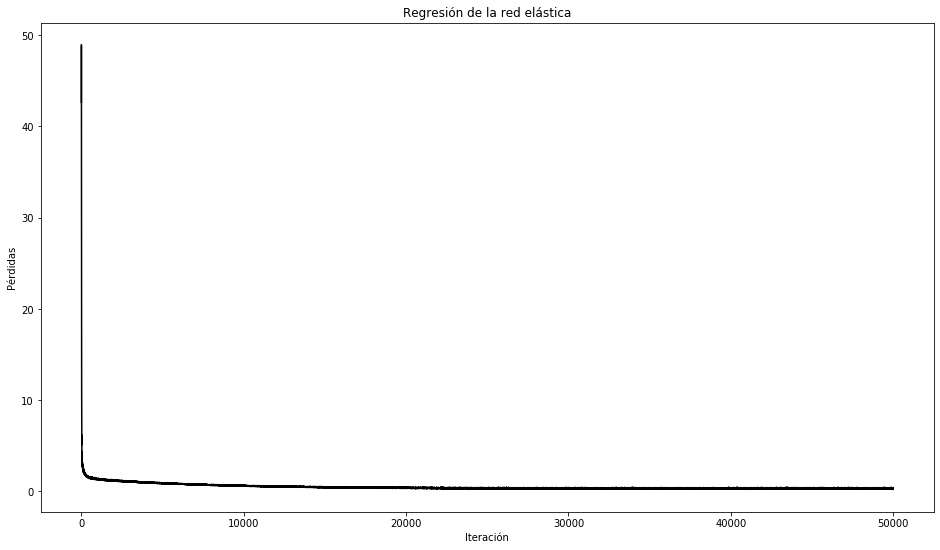

In [36]:
plt.figure(figsize = (16, 9))
plt.plot(loss_vect, "k-")
plt.title("Regresión de la red elástica")
plt.xlabel("Iteración")
plt.ylabel("Pérdidas")
plt.show()